In [34]:
#Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets #datasets package embeds some small toy datasets as introduced in the Getting Started section
from sklearn.model_selection import train_test_split

In [35]:
#Loading Data From Sklearn
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()

In [36]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [37]:
#We need to convert this dataset to pandas dataframe
data=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)

In [38]:
#Print first 5 row and columns
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
#Adding the 'Target' column in DataFrame
data["target"]=breast_cancer_dataset.target

In [40]:
#Printing last 5 rows and columns
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [41]:
#Number of rows and columns in the dataframe
data.shape

(569, 31)

In [42]:
#Getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [43]:
#Checking missing values
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [44]:
#Statistical measures about the data
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [45]:
#Checking the distribution of Target value
data["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

# 1-->Benign
# 2-->Malignant

In [46]:
#Groupby Method
data.groupby("target").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [47]:
#Seperating Features and Targets
X=data.drop(columns="target",axis=1)
Y=data["target"]

In [48]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [49]:
#Splitting Data into Training and Test 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [51]:
print(X_train)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
560        14.05         27.15           91.38      600.4          0.09929   
428        11.13         16.62           70.47      381.1          0.08151   
198        19.18         22.49          127.50     1148.0          0.08523   
203        13.81         23.75           91.56      597.8          0.13230   
41         10.95         21.35           71.90      371.1          0.12270   
..           ...           ...             ...        ...              ...   
299        10.51         23.09           66.85      334.2          0.10150   
534        10.96         17.62           70.79      365.6          0.09687   
493        12.46         12.83           78.83      477.3          0.07372   
527        12.34         12.27           78.94      468.5          0.09003   
168        17.47         24.68          116.10      984.6          0.10490   

     mean compactness  mean concavity  mean concave points  mea

# Standarize the data

In [52]:
#Needed library
from sklearn.preprocessing import StandardScaler

In [53]:
#Creating Scaler
scaler=StandardScaler()

In [54]:
#Fit the Scaler 
X_train_std=scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [55]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


# Building Neural Network

In [56]:
import tensorflow as tf #TensorFlow is an end-to-end open source platform for machine learning which is developed by Google.
tf.random.set_seed(3)  #Random way of generating values.
from tensorflow import keras #Keras is a high-level, deep learning API developed by Google for implementing neural networks.

In [57]:
#Creating the Layers of Neural Network

model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(30,)), #It is used to flatten data in matrix form.Input layer.We have to convert 1-d array.
                         keras.layers.Dense(20,activation='relu'),#Hidden layer.
                         keras.layers.Dense(2,activation='sigmoid')#Output layer.We have two classes (1 or 0) so we have 2 neurons.
])

In [58]:
#Compiling the Neural Network
model.compile(optimizer='adam', #like gradient descent
              loss='sparse_categorical_crossentropy',#If target features be 1 or 0 we use Sparse_categorical_entropy
              metrics=['accuracy']) 

In [59]:
#Training the Neural Network
history=model.fit(X_train_std,Y_train,validation_split=0.1,epochs=10)
#Epochs is how many iteration the model fit.   
#validation split is how much percantage for cross validation.
#Loss function decreasing accuracy increasing.

Epoch 1/10
13/13 [==============================] - 1s 17ms/step - loss: 0.6266 - accuracy: 0.6944 - val_loss: 0.4355 - val_accuracy: 0.7826
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.4532 - accuracy: 0.8264 - val_loss: 0.3323 - val_accuracy: 0.8696
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.8778 - val_loss: 0.2766 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2930 - accuracy: 0.8949 - val_loss: 0.2404 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2541 - accuracy: 0.9095 - val_loss: 0.2140 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2252 - accuracy: 0.9315 - val_loss: 0.1934 - val_accuracy: 0.9348
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2021 - accuracy: 0.9389 - val_loss: 0.1759 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

# Visualizing Accuracy and Loss

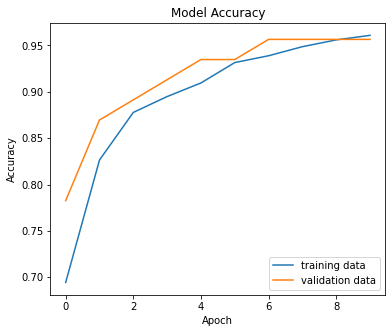

In [64]:
plt.figure(figsize=(6,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Apoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')

plt.show()

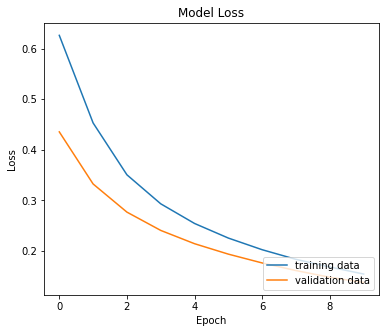

In [65]:
plt.figure(figsize=(6,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')

plt.show()

# Accuracy of the Model on Test Data

In [66]:
loss, accuracy=model.evaluate(X_test_std,Y_test)
print("Accuracy score on test data : ",accuracy)

4/4 [==============================] - 0s 7ms/step - loss: 0.1592 - accuracy: 0.9386
Accuracy score on test data :  0.9385964870452881


In [67]:
print(X_test_std.shape)
print(X_test_std)

(114, 30)
[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [68]:
Y_pred=model.predict(X_test_std)

4/4 [==============================] - 0s 4ms/step


In [69]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.47387606 0.37565848]


In [70]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [72]:
print(Y_pred)

[[0.47387606 0.37565848]
 [0.42111588 0.46300113]
 [0.08865969 0.9724016 ]
 [0.9964359  0.0570686 ]
 [0.47104445 0.4549334 ]
 [0.9712303  0.09937704]
 [0.26162195 0.7908045 ]
 [0.12306611 0.95285976]
 [0.29291192 0.8125508 ]
 [0.27741197 0.8950569 ]
 [0.36107346 0.5908579 ]
 [0.21438722 0.7990899 ]
 [0.3064905  0.6563519 ]
 [0.36441284 0.7128871 ]
 [0.16904661 0.9029167 ]
 [0.865943   0.58036613]
 [0.12308771 0.9518203 ]
 [0.21796656 0.873148  ]
 [0.24221766 0.8695558 ]
 [0.9221881  0.07302243]
 [0.7954875  0.97524744]
 [0.12951505 0.966104  ]
 [0.17090613 0.91145945]
 [0.15840203 0.9302157 ]
 [0.23641618 0.8195916 ]
 [0.86772776 0.13628712]
 [0.29106945 0.84848386]
 [0.37036818 0.72006726]
 [0.69649106 0.18211725]
 [0.80764824 0.18222678]
 [0.32272774 0.8053327 ]
 [0.32217646 0.77132976]
 [0.23413311 0.9162626 ]
 [0.97957337 0.02944616]
 [0.9262556  0.06008236]
 [0.30881444 0.83999026]
 [0.08651201 0.982314  ]
 [0.29014096 0.60982245]
 [0.10117105 0.9636398 ]
 [0.25700465 0.823415  ]



model.predict() gives the prediction probability of each class for that data point

In [73]:
#Converting the prediction probability to class labels
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


In [75]:
#Argmax Function
my_list=[0.28, 0.63, 0.73]
index=np.argmax(my_list)
print(index)

2


# Building a Predictive System 

In [78]:
input_data=np.array([11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563])

# Reshape the numpy array as we are predicting for one data point
input_data_res=input_data.reshape(1,-1)

#Standardizing the input data
input_data_std=scaler.transform(input_data_res)

prediction=model.predict(input_data_std)
print(prediction)

print("-------")
prediction_label=[np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
[[0.11444674 0.96803653]]
-------
[1]
The tumor is Benign
